This notebook is for hyperparameter optimization on the two basline CNN models: 

    3 x ([Conv --> Batchnorm --> ReLU] x N) --> FC --> Softmax 
    3 x ([Conv --> Batchnorm --> ReLU] x N) --> [Conv --> Batchnorm --> ReLU] x M --> FC --> Softmax

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module 
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=256)

In [3]:
# establish network dimensions 
layer0_params = [1, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1]

layer1_params = [1, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1]

layer2_params = [1, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1]

fc_params = [54, 150, 100, 50, 3, 0.5]

In [9]:
# trying out the module API network
# in this case we use flag = False 
module_test = ThreeCNN_Module(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, fc_params)

optimizer = optim.Adam(module_test.parameters())

# train the network for one epoch 
hist, bestModel = train(loader_train, loader_val, module_test, optimizer, epochs=2, returnBest=True)


Epoch 1/2:
Iteration 0, loss = 1.1043
Got 10346 / 30000 correct (34.49)

Iteration 100, loss = 0.7236
Got 19941 / 30000 correct (66.47)

Iteration 200, loss = 0.5240
Got 20848 / 30000 correct (69.49)

Iteration 300, loss = 0.6293
Got 21272 / 30000 correct (70.91)

Iteration 400, loss = 0.5410
Got 21362 / 30000 correct (71.21)

Iteration 500, loss = 0.5704
Got 21330 / 30000 correct (71.10)

Iteration 600, loss = 0.5287
Got 21562 / 30000 correct (71.87)

Iteration 700, loss = 0.5004
Got 21578 / 30000 correct (71.93)

Got 129719 / 180000 correct (72.07)
Got 21647 / 30000 correct (72.16)

Epoch 2/2:
Iteration 0, loss = 0.5985
Got 21689 / 30000 correct (72.30)

Iteration 100, loss = 0.4814
Got 21734 / 30000 correct (72.45)

Iteration 200, loss = 0.4883
Got 21514 / 30000 correct (71.71)

Iteration 300, loss = 0.4581
Got 21795 / 30000 correct (72.65)

Iteration 400, loss = 0.4756
Got 21886 / 30000 correct (72.95)

Iteration 500, loss = 0.4945
Got 21977 / 30000 correct (73.26)

Iteration 600,

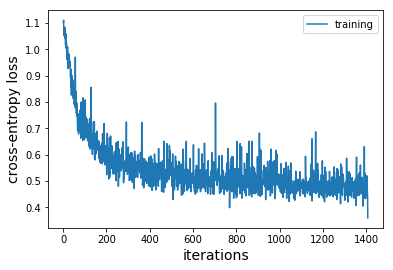

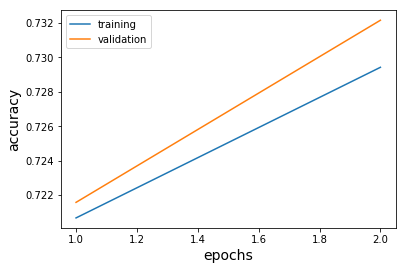

In [10]:
trainingMetrics(hist)

Min / max of y_test
0 2
(30000,)
-37.630318 6.8268614


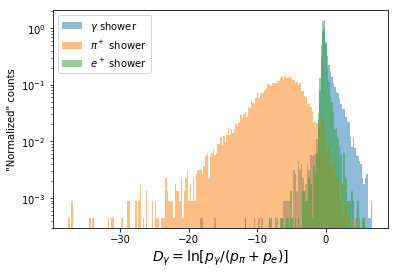

../plottingFcts.py:213: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


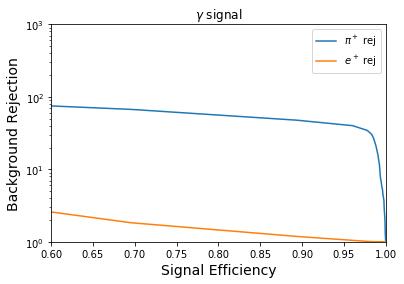

Min / max of y_test
0 2
(30000,)
-15.273118 38.06355


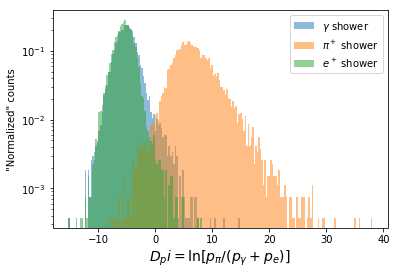

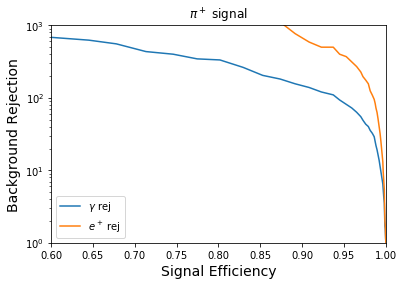

Min / max of y_test
0 2
(30000,)
-42.41313 1.7456048


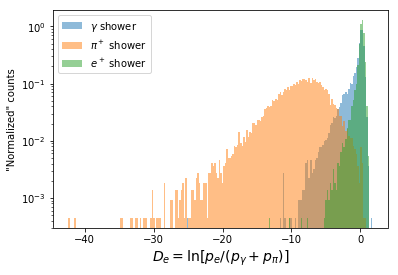

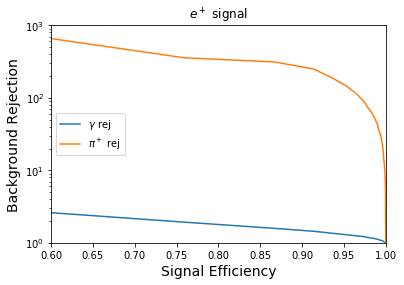

In [11]:
# get ROC curves for model 
for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(module_test, loader_val, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')